# Brain Tumour Detection using Convolutional Neural Networks

Dataset used: https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection?select=no

### Imports:

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [7]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/Users/omachrekar/Desktop/My Work/Artificial Intelligence Projects/Brain tumour detection using CNN/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [8]:
paths = []
for r, d, f in os.walk(r"/Users/omachrekar/Desktop/My Work/Artificial Intelligence Projects/Brain tumour detection using CNN/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [9]:
data = np.array(data)
data.shape

(2891, 128, 128, 3)

In [10]:
result = np.array(result)
result = result.reshape(2891, 2)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [12]:
x_train

array([[[[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        ...,

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10]],

        [[ 10,  10,  10],
         [ 10,  10,  10],
         [ 10,  10,  10],
         ...,
         [ 10,  10,  10],
        

In [13]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [17]:
model.compile(loss = "categorical_crossentropy", optimizer='Adamax')

In [20]:
fitting = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
58/58 [==============================] - 21s 351ms/step - loss: 0.0070 - val_loss: 0.1195
Epoch 2/30
58/58 [==============================] - 21s 357ms/step - loss: 0.0055 - val_loss: 0.1679
Epoch 3/30
58/58 [==============================] - 21s 360ms/step - loss: 0.0098 - val_loss: 0.1126
Epoch 4/30
58/58 [==============================] - 21s 363ms/step - loss: 0.0066 - val_loss: 0.0739
Epoch 5/30
58/58 [==============================] - 21s 368ms/step - loss: 0.0106 - val_loss: 0.1461
Epoch 6/30
58/58 [==============================] - 21s 371ms/step - loss: 0.0052 - val_loss: 0.1687
Epoch 7/30
58/58 [==============================] - 22s 372ms/step - loss: 0.0016 - val_loss: 0.1454
Epoch 8/30
58/58 [==============================] - 22s 372ms/step - loss: 9.6247e-04 - val_loss: 0.1594
Epoch 9/30
58/58 [==============================] - 22s 380ms/step - loss: 0.0024 - val_loss: 0.1519
Epoch 10/30
58/58 [==============================] - 23s 395ms/step - loss: 0.0015 - va

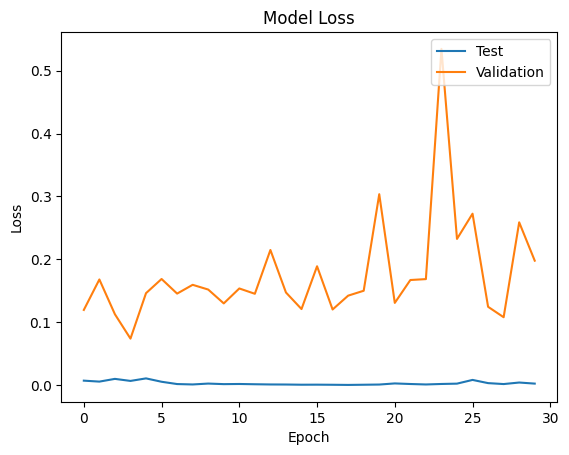

In [21]:
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [35]:
from matplotlib.pyplot import imshow

def result_class(number):
    if number==0:
        return 'It is classifies as a tumour.'
    else:
        return 'It is not classified as a tumour.'

def predict_tumour(path):
    img = Image.open(path, mode='r')
    x = np.array(img.resize((128,128)))
    x = x.reshape(1,128,128,3)
    res = model.predict_on_batch(x)
    classification = np.where(res == np.amax(res))[1][0]
    imshow(img)
    print('Confidence: '+ str(res[0][classification]*100))
    print('Result: '+ result_class(classification))

Confidence: 99.99992847442627
Result: It is classifies as a tumour.


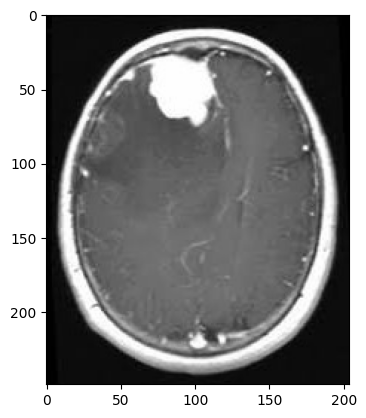

In [36]:
predict_tumour("/Users/omachrekar/Desktop/My Work/Artificial Intelligence Projects/Brain tumour detection using CNN/pred/pred7.jpg")


Confidence: 99.99445676803589
Result: It is classifies as a tumour.


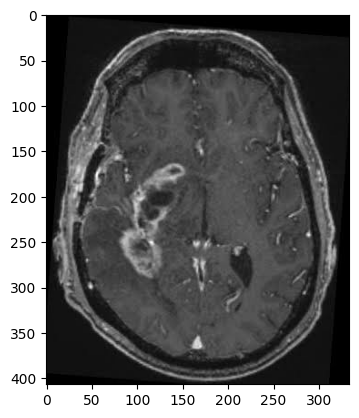

In [37]:
predict_tumour("/Users/omachrekar/Desktop/My Work/Artificial Intelligence Projects/Brain tumour detection using CNN/pred/pred11.jpg")


Confidence: 100.0
Result: It is not classified as a tumour.


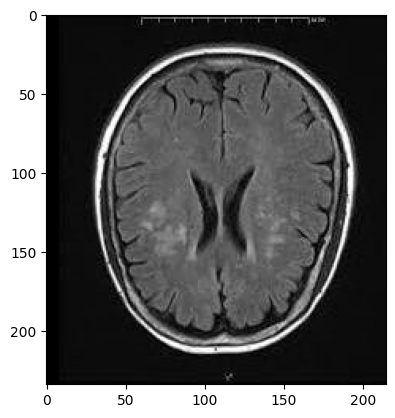

In [38]:
predict_tumour("/Users/omachrekar/Desktop/My Work/Artificial Intelligence Projects/Brain tumour detection using CNN/pred/pred12.jpg")